In [24]:
import pandas as pd
import numpy as np
import math
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, probplot
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [25]:
df = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/train.csv')

In [26]:
df['LogSalePrice'] = np.log(df['SalePrice'])

AttributeError: 'list' object has no attribute 'is_all_dates'

In [18]:
sns.distplot(df.SalePrice,fit=norm)

AttributeError: 'list' object has no attribute 'is_all_dates'

In [19]:
sns.distplot(df.LogSalePrice,fit=norm)

AttributeError: 'DataFrame' object has no attribute 'LogSalePrice'

In [14]:
corrmat = df.corr()
corrs = list(corrmat.nlargest(7,'LogSalePrice')['LogSalePrice'].index)[2:]
corrs

AttributeError: 'list' object has no attribute 'is_all_dates'

In [20]:
corrs_df = pd.DataFrame()
corrs_df.index = corrs
corrs_df

AttributeError: 'list' object has no attribute 'nlevels'

Empty DataFrame
Columns: []
Index: [OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF]

In [17]:
x = df[['GrLivArea','GarageArea','TotalBsmtSF','OverallQual','GarageCars','Neighborhood']]
y = df['LogSalePrice']

In [18]:
# Build the model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
linreg = LinearRegression()
ml = make_pipeline(column_trans, linreg)
ml.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linearregression', LinearRegression())])

In [19]:
# Predict the test set results
from sklearn.metrics import r2_score
y_pred = ml.predict(x_test)
r2_score(y_test,y_pred)

0.7874014983917544

In [38]:
# Calculate VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
test_variables = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
vif_data = pd.DataFrame()
vif_data['Variable'] = test_variables.columns
vif_data['VIF'] = [variance_inflation_factor(test_variables.values, i) for i in range(len(test_variables.columns))]
print(vif_data)
#Neighborhood

      Variable        VIF
0  OverallQual  24.240732
1    GrLivArea  15.264837
2   GarageCars  32.416942
3   GarageArea  28.474761
4  TotalBsmtSF  10.662725


In [91]:
#GarageCars & GarageArea -> Drop GarageCars
test1 = df.drop('GarageCars',axis=1)
x2 = df[['GrLivArea','TotalBsmtSF','OverallQual','GarageArea','Neighborhood']]
y2 = df.LogSalePrice
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
linreg = LinearRegression()
ml = make_pipeline(column_trans, linreg)
ml.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linearregression', LinearRegression())])

In [93]:
# Predict the test1 results
y_pred = ml.predict(x_test)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7816208799565858

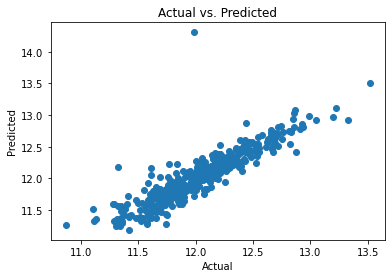

In [95]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [96]:
test = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [103]:
X = test[['GrLivArea','TotalBsmtSF','OverallQual','GarageArea','Neighborhood']]
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
X.fillna(0,inplace=True)
pred = ml.predict(X)

/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [104]:
submission = pd.DataFrame({'ID': test['Id'],'SalePrice': np.exp(pred)})
submission

,ID,SalePrice
0,1461,133996.361604
1,1462,154966.778986
2,1463,166938.629465
3,1464,181401.223539
4,1465,230741.314527
...,...,...
1454,2915,83796.060773
1455,2916,90866.658546
1456,2917,148252.416220
1457,2918,113029.796978


In [105]:
submission.to_csv('submission.csv', index=False)